# Introduction to Convolutional Neural Networks and Computer Vision with TensorFlow

In [ ]:
#Getting data

import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

#Unzip
zip_ref = zipfile.ZipFile("pizza_steak.zip")
zip_ref.extractall()
zip_ref.close()

--2022-06-24 11:05:58--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.188.48, 172.217.164.176, 142.251.45.16, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.188.48|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M   105MB/s    in 1.0s    

2022-06-24 11:06:00 (105 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



In [ ]:
import matplotlib.pyplot as plt
import os
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.image as mpimg
import pathlib
import random

In [ ]:
for dirpath, dirnames, filenames in os.walk("pizza_steak"):
  print(f"{len(dirnames)} directories and {len(filenames)} files in '{dirpath}'")

2 directories and 0 files in 'pizza_steak'
2 directories and 0 files in 'pizza_steak/test'
0 directories and 250 files in 'pizza_steak/test/pizza'
0 directories and 250 files in 'pizza_steak/test/steak'
2 directories and 0 files in 'pizza_steak/train'
0 directories and 750 files in 'pizza_steak/train/pizza'
0 directories and 750 files in 'pizza_steak/train/steak'


In [ ]:
data_dir = pathlib.Path("pizza_steak/train")
class_names = np.array(sorted([item.name for item in data_dir.glob("*")]))
print(class_names)

['pizza' 'steak']


In [ ]:
def view_random_image(target_dir="pizza_steak/train/", target_classes=class_names):
  target_class = class_names[random.randint(0, len(target_classes)-1)]
  target_folder = target_dir+target_class
  random_image = random.sample(os.listdir(target_folder), 1)

  img = mpimg.imread(target_folder +"/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off")

  print(f"Image shape: {img.shape}")
  return img

Image shape: (384, 512, 3)


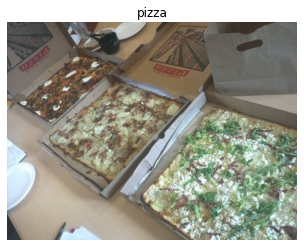

In [ ]:
img = view_random_image()

In [ ]:
from matplotlib.rcsetup import validate_animation_writer_path
from tensorflow.keras.preprocessing.image import ImageDataGenerator

tf.random.set_seed(42)
#Preprocess and normalize data
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

#import data and turn into batches

train_dir = "pizza_steak/train"
test_dir = "pizza_steak/test"

train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode='binary',
                                               seed=42)

valid_data = train_datagen.flow_from_directory(directory=test_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode="binary",
                                               seed=42)

# Build a CNN model as per Tiny VGG

model_1 = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(filters=10,
                         kernel_size=3,
                         activation="relu",
                         input_shape=(224,224,3)),
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.MaxPool2D(pool_size=2,
                            padding="valid"),
  tf.keras.layers.Conv2D(10, 3, activation="relu"),                                                     
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.MaxPool2D(2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(1, activation="sigmoid")                                                   
])

model_1.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

history_1 = model_1.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/5
47/47 [==============================] - 26s 205ms/step - loss: 0.5655 - accuracy: 0.7227 - val_loss: 0.4589 - val_accuracy: 0.7860
Epoch 2/5
47/47 [==============================] - 9s 193ms/step - loss: 0.4517 - accuracy: 0.7873 - val_loss: 0.3403 - val_accuracy: 0.8620
Epoch 3/5
47/47 [==============================] - 9s 192ms/step - loss: 0.3912 - accuracy: 0.8327 - val_loss: 0.3119 - val_accuracy: 0.8560
Epoch 4/5
47/47 [==============================] - 9s 192ms/step - loss: 0.3649 - accuracy: 0.8393 - val_loss: 0.3005 - val_accuracy: 0.8740
Epoch 5/5
47/47 [==============================] - 9s 192ms/step - loss: 0.3343 - accuracy: 0.8593 - val_loss: 0.3726 - val_accuracy: 0.8480


In [ ]:
## Using the same model as before
tf.random.set_seed(42)

model_2 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(224, 224, 3)),
  tf.keras.layers.Dense(1000, activation="relu"),
  tf.keras.layers.Dense(1000, activation="relu"),
  tf.keras.layers.Dense(1000, activation="relu"),
  tf.keras.layers.Dense(1000, activation="relu"),
  tf.keras.layers.Dense(1, activation="sigmoid")
])

model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

history_2 = model_2.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 9s 191ms/step - loss: 6.4803 - accuracy: 0.6440 - val_loss: 0.5522 - val_accuracy: 0.7300
Epoch 2/5
47/47 [==============================] - 9s 186ms/step - loss: 0.5474 - accuracy: 0.7373 - val_loss: 0.4870 - val_accuracy: 0.7660
Epoch 3/5
47/47 [==============================] - 9s 187ms/step - loss: 0.5168 - accuracy: 0.7647 - val_loss: 0.6815 - val_accuracy: 0.6760
Epoch 4/5
47/47 [==============================] - 9s 188ms/step - loss: 0.5083 - accuracy: 0.7807 - val_loss: 0.7563 - val_accuracy: 0.6640
Epoch 5/5
47/47 [==============================] - 9s 188ms/step - loss: 0.4690 - accuracy: 0.7967 - val_loss: 0.6281 - val_accuracy: 0.7200


In [ ]:
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 150528)            0         
                                                                 
 dense_1 (Dense)             (None, 1000)              150529000 
                                                                 
 dense_2 (Dense)             (None, 1000)              1001000   
                                                                 
 dense_3 (Dense)             (None, 1000)              1001000   
                                                                 
 dense_4 (Dense)             (None, 1000)              1001000   
                                                                 
 dense_5 (Dense)             (None, 1)                 1001      
                                                                 
Total params: 153,533,001
Trainable params: 153,533,00

In [ ]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 10)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 53, 53, 10)       0         
 2D)                                                    

In [ ]:
model_1.evaluate(valid_data, steps=16)

16/16 [==============================] - 2s 136ms/step - loss: 0.3726 - accuracy: 0.8480


[0.37260761857032776, 0.8479999899864197]

## Binary Classification

1. Become one with the data (visualize)
2. Preprocess the data (prepare it for the model
3. Create model(start with a baseline)
4. Fit the model
5. Evaluate
6. Adjust different parameters and improve the model
7. Repeat until satisfied

### 1. Become one with the data


Image shape: (512, 512, 3)
Image shape: (306, 512, 3)


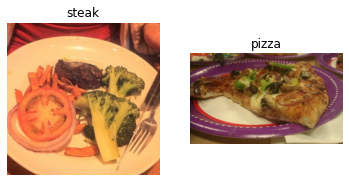

In [ ]:
plt.figure()
plt.subplot(1,2,1)
img_1 = view_random_image()
plt.subplot(1,2,2)
img_2 = view_random_image()

### 2. Preprocess the data

In [ ]:
#Define the directory dataset paths

train_dir = "pizza_steak/train"
test_dir = "pizza_steak/test"

Our next step is to turn our data into **batches**

smaller subset of data, typically 32 at a step

for the following:
1. large datasets may not fit in memory
2. trying to the learn patterns in large datasets all at once will result in the model not learning very well
#

In [ ]:
# create train and test data generators and rescale the data

from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
train_data_2 = train_datagen.flow_from_directory(directory=train_dir,
                                               target_size=(224,224),
                                               class_mode="binary",
                                               batch_size=32)

test_data_2 = test_datagen.flow_from_directory(directory=test_dir,
                                             target_size=(224,224),
                                             class_mode="binary",
                                             batch_size=32)



Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [ ]:
train_data

In [ ]:
images, labels = train_data.next()
len(images), len(labels)

(32, 32)

In [ ]:
len(train_data)

47

In [ ]:
images[0].shape

(224, 224, 3)

In [ ]:
images[0]

array([[[0.25882354, 0.21568629, 0.13725491],
        [0.31764707, 0.28235295, 0.22352943],
        [0.3254902 , 0.28235295, 0.25882354],
        ...,
        [0.10980393, 0.05882353, 0.08627451],
        [0.10588236, 0.05490196, 0.08235294],
        [0.10196079, 0.05882353, 0.08235294]],

       [[0.32941177, 0.29411766, 0.227451  ],
        [0.30588236, 0.26666668, 0.21960786],
        [0.30588236, 0.26666668, 0.23137257],
        ...,
        [0.10980393, 0.05882353, 0.08627451],
        [0.1137255 , 0.0627451 , 0.09019608],
        [0.10588236, 0.0627451 , 0.08627451]],

       [[0.29411766, 0.25490198, 0.21960786],
        [0.32941177, 0.2901961 , 0.25490198],
        [0.30980393, 0.2784314 , 0.23529413],
        ...,
        [0.1137255 , 0.0627451 , 0.09019608],
        [0.10588236, 0.05490196, 0.08235294],
        [0.10980393, 0.06666667, 0.09019608]],

       ...,

       [[0.03529412, 0.03137255, 0.01568628],
        [0.03529412, 0.03137255, 0.01568628],
        [0.01568628, 0

In [ ]:
train_data.class_indices

{'pizza': 0, 'steak': 1}

### 3. Create a CNN model for baseline purposes

In [ ]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation
from tensorflow.keras import Sequential

model_4 = Sequential([
  Conv2D(filters=10,
         kernel_size=3,
         strides=1,
         padding='valid',
         activation='relu',
         input_shape=(224,224,3)),
  Conv2D(10, 3, activation="relu"),
  Conv2D(10, 3, activation="relu"),
  Flatten(),
  Dense(1, activation="sigmoid")
])

In [ ]:
model_4.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

history_4 = model_4.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data_2),
                        validation_data=test_data_2,
                        validation_steps=len(test_data_2))

Epoch 1/5
47/47 [==============================] - 11s 209ms/step - loss: 0.7262 - accuracy: 0.7307 - val_loss: 0.4023 - val_accuracy: 0.8260
Epoch 2/5
47/47 [==============================] - 9s 191ms/step - loss: 0.4079 - accuracy: 0.8287 - val_loss: 0.3607 - val_accuracy: 0.8480
Epoch 3/5
47/47 [==============================] - 9s 194ms/step - loss: 0.3041 - accuracy: 0.8907 - val_loss: 0.4775 - val_accuracy: 0.7820
Epoch 4/5
47/47 [==============================] - 9s 190ms/step - loss: 0.1763 - accuracy: 0.9453 - val_loss: 0.3473 - val_accuracy: 0.8540
Epoch 5/5
47/47 [==============================] - 9s 191ms/step - loss: 0.1027 - accuracy: 0.9687 - val_loss: 0.3707 - val_accuracy: 0.8540


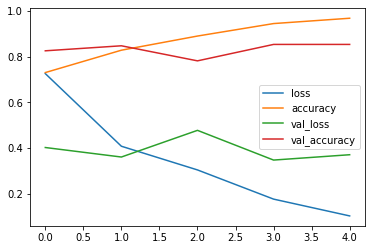

In [ ]:
pd.DataFrame(history_4.history).plot()

### 6. Adjust model parameters

Fitting a machine learning model comes in 3 steps

0. Create a baseline
1. Beat the baseline by overfitting
2. Reduce overfitting

Ways to induce overfitting:

* Increase number of conv layers
* Increase number of conv filters
* Add another dense layer to the output of our flattened layer

Reduce overfitting:

* Add data augmentation
* Add regularization(Such as pooling)
* Add more data

In [ ]:
model_5 = Sequential([
  Conv2D(10, 3, activation="relu", input_shape=(224,224,3)),
  MaxPool2D(pool_size=2), 
  Conv2D(10, 3, activation="relu"),
  MaxPool2D(),
  Conv2D(10, 3, activation="relu"),
  MaxPool2D(),
  Flatten(),
  Dense(1, activation="sigmoid")
])

model_5.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=Adam(),
                metrics=["accuracy"])

In [ ]:
history_5 = model_5.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 9s 187ms/step - loss: 0.6411 - accuracy: 0.6280 - val_loss: 0.4719 - val_accuracy: 0.8080
Epoch 2/5
47/47 [==============================] - 9s 182ms/step - loss: 0.4638 - accuracy: 0.7900 - val_loss: 0.3938 - val_accuracy: 0.8180
Epoch 3/5
47/47 [==============================] - 9s 183ms/step - loss: 0.4177 - accuracy: 0.8153 - val_loss: 0.3470 - val_accuracy: 0.8600
Epoch 4/5
47/47 [==============================] - 9s 185ms/step - loss: 0.3808 - accuracy: 0.8260 - val_loss: 0.3475 - val_accuracy: 0.8420
Epoch 5/5
47/47 [==============================] - 9s 182ms/step - loss: 0.3912 - accuracy: 0.8273 - val_loss: 0.3627 - val_accuracy: 0.8340


In [ ]:
model_5.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 111, 111, 10)     0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 54, 54, 10)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 52, 52, 10)        910       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 26, 26, 10)      

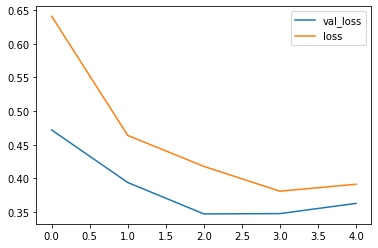

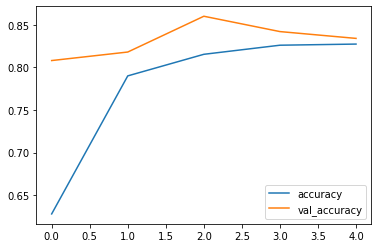

In [ ]:
pd.DataFrame(history_5.history)[["val_loss", "loss"]].plot()
pd.DataFrame(history_5.history)[["accuracy", "val_accuracy"]].plot()

### Data augmentation

In [ ]:
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                             rotation_range=0.2,
                                             shear_range=0.2,
                                             zoom_range=0.2,
                                             width_shift_range=0.2,
                                             height_shift_range=0.3,
                                             horizontal_flip=True)

#comparison
train_datagen = ImageDataGenerator(rescale=1/255.)

test_datagen = ImageDataGenerator(rescale=1/255.)

In [ ]:
train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                   target_size=(224, 224),
                                                                   batch_size=32,
                                                                   class_mode='binary')

train_data_non_augmented = train_datagen.flow_from_directory(train_dir,
                                                             target_size=(224, 224),
                                                             batch_size=32,
                                                             class_mode='binary')
test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=(224, 224),
                                             batch_size=32,
                                             class_mode='binary')


Found 1500 images belonging to 2 classes.
Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [ ]:
images, labels = train_data_non_augmented.next()
augmented_images, augmented_labels = train_data_augmented.next()

(-0.5, 223.5, 223.5, -0.5)

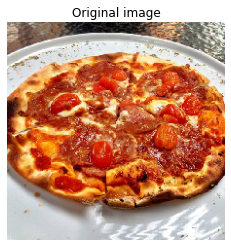

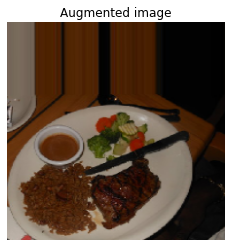

In [ ]:
#show original image and augmented

random_number = random.randint(0, len(images)-1)
plt.imshow(images[random_number])
plt.title("Original image")
plt.axis(False)
plt.figure()
plt.imshow(augmented_images[random_number])
plt.title("Augmented image")
plt.axis(False)

In [ ]:
model_6 = Sequential([
  Conv2D(10, 3, activation="relu", input_shape=(224,224,3)),
  MaxPool2D(pool_size=2), 
  Conv2D(10, 3, activation="relu"),
  MaxPool2D(),
  Conv2D(10, 3, activation="relu"),
  MaxPool2D(),
  Flatten(),
  Dense(1, activation="sigmoid")
])

model_6.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=Adam(),
                metrics=["accuracy"])

In [ ]:
history_6 = model_6.fit(train_data_augmented,
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 24s 493ms/step - loss: 0.6751 - accuracy: 0.5613 - val_loss: 0.5967 - val_accuracy: 0.7000
Epoch 2/5
47/47 [==============================] - 22s 459ms/step - loss: 0.5829 - accuracy: 0.7020 - val_loss: 0.4917 - val_accuracy: 0.7360
Epoch 3/5
47/47 [==============================] - 22s 461ms/step - loss: 0.5488 - accuracy: 0.7207 - val_loss: 0.4538 - val_accuracy: 0.7760
Epoch 4/5
47/47 [==============================] - 21s 457ms/step - loss: 0.5122 - accuracy: 0.7673 - val_loss: 0.3460 - val_accuracy: 0.8600
Epoch 5/5
47/47 [==============================] - 22s 460ms/step - loss: 0.4954 - accuracy: 0.7567 - val_loss: 0.3524 - val_accuracy: 0.8440


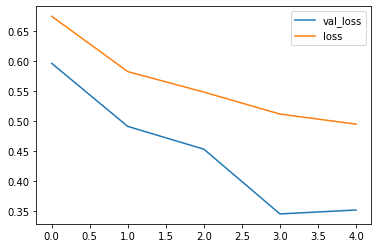

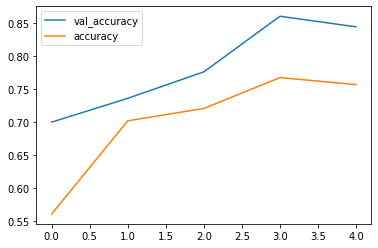

In [ ]:
pd.DataFrame(history_6.history)[["val_loss", "loss"]].plot()
pd.DataFrame(history_6.history)[["val_accuracy", "accuracy"]].plot()

In [ ]:
model_7 = Sequential([
  Conv2D(32, 3, activation="relu", input_shape=(224,224,3)),
  MaxPool2D(pool_size=2), 
  Conv2D(32, 3, activation="relu"),
  MaxPool2D(),
  Conv2D(32, 3, activation="relu"),
  MaxPool2D(),
  Conv2D(32, 3, activation="relu"),
  MaxPool2D(),
  Flatten(),
  Dense(1, activation="sigmoid")
])

model_7.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=Adam(),
                metrics=["accuracy"])

history_7 = model_7.fit(train_data_augmented,
                        epochs=10,
                        steps_per_epoch=len(train_data_augmented),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/10
47/47 [==============================] - 23s 478ms/step - loss: 0.6652 - accuracy: 0.5940 - val_loss: 0.5129 - val_accuracy: 0.7400
Epoch 2/10
47/47 [==============================] - 22s 471ms/step - loss: 0.5749 - accuracy: 0.7007 - val_loss: 0.3958 - val_accuracy: 0.8360
Epoch 3/10
47/47 [==============================] - 22s 465ms/step - loss: 0.5154 - accuracy: 0.7487 - val_loss: 0.4397 - val_accuracy: 0.8060
Epoch 4/10
47/47 [==============================] - 22s 465ms/step - loss: 0.5137 - accuracy: 0.7493 - val_loss: 0.3426 - val_accuracy: 0.8740
Epoch 5/10
47/47 [==============================] - 22s 470ms/step - loss: 0.4957 - accuracy: 0.7593 - val_loss: 0.3849 - val_accuracy: 0.8180
Epoch 6/10
47/47 [==============================] - 23s 487ms/step - loss: 0.4618 - accuracy: 0.7893 - val_loss: 0.3381 - val_accuracy: 0.8600
Epoch 7/10
47/47 [==============================] - 22s 467ms/step - loss: 0.4411 - accuracy: 0.8000 - val_loss: 0.5132 - val_accuracy: 0.7980

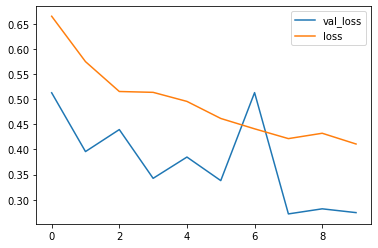

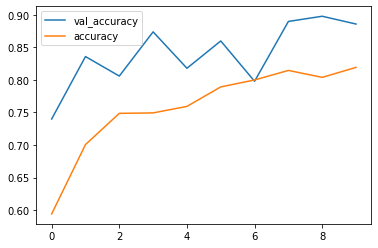

In [ ]:
pd.DataFrame(history_7.history)[["val_loss", "loss"]].plot()
rpd.DataFrame(history_7.history)[["val_accuracy", "accuracy"]].plot()

In [ ]:
tf.random.set_seed(69)

model_8 = Sequential([
  Conv2D(32, 3, activation="relu", input_shape=(224,224,3)),
  Conv2D(32, 3, activation="relu"),
  MaxPool2D(3),
  Conv2D(32, 3, activation="relu"),
  Conv2D(32, 3, activation="relu"),
  MaxPool2D(3),
  Conv2D(32, 3, activation="relu"),
  Conv2D(32, 3, activation="relu"),
  MaxPool2D(3),
  Flatten(),
  Dense(1, activation="sigmoid")
])

model_8.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=Adam(),
                metrics=["accuracy"])

history_8 = model_8.fit(train_data_augmented,
                        epochs=10,
                        steps_per_epoch=len(train_data_augmented),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/10
47/47 [==============================] - 28s 581ms/step - loss: 0.6624 - accuracy: 0.6013 - val_loss: 0.5706 - val_accuracy: 0.7740
Epoch 2/10
47/47 [==============================] - 23s 484ms/step - loss: 0.5755 - accuracy: 0.7087 - val_loss: 0.4029 - val_accuracy: 0.8540
Epoch 3/10
47/47 [==============================] - 23s 495ms/step - loss: 0.5089 - accuracy: 0.7580 - val_loss: 0.3902 - val_accuracy: 0.8160
Epoch 4/10
47/47 [==============================] - 24s 509ms/step - loss: 0.4886 - accuracy: 0.7587 - val_loss: 0.3333 - val_accuracy: 0.8640
Epoch 5/10
47/47 [==============================] - 23s 484ms/step - loss: 0.5199 - accuracy: 0.7420 - val_loss: 0.3277 - val_accuracy: 0.8660
Epoch 6/10
47/47 [==============================] - 23s 485ms/step - loss: 0.4765 - accuracy: 0.7833 - val_loss: 0.2958 - val_accuracy: 0.8800
Epoch 7/10
47/47 [==============================] - 23s 483ms/step - loss: 0.4378 - accuracy: 0.8020 - val_loss: 0.3321 - val_accuracy: 0.8620

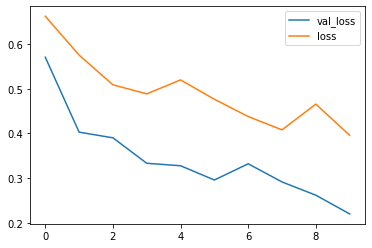

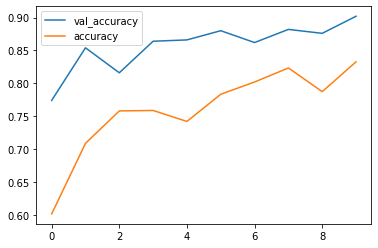

In [ ]:
pd.DataFrame(history_8.history)[["val_loss", "loss"]].plot()
pd.DataFrame(history_8.history)[["val_accuracy", "accuracy"]].plot()

In [ ]:
model_8.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_23 (Conv2D)          (None, 222, 222, 32)      896       
                                                                 
 conv2d_24 (Conv2D)          (None, 220, 220, 32)      9248      
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 73, 73, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_25 (Conv2D)          (None, 71, 71, 32)        9248      
                                                                 
 conv2d_26 (Conv2D)          (None, 69, 69, 32)        9248      
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 23, 23, 32)       0         
 g2D)                                                 

In [ ]:
## Making a prediction with our model

In [ ]:
class_names

array(['pizza', 'steak'], dtype='<U5')

In [ ]:
!wget https://i.redd.it/mx46xc069ol31.jpg


--2022-06-24 11:25:49--  https://i.redd.it/mx46xc069ol31.jpg
Resolving i.redd.it (i.redd.it)... 151.101.1.140, 151.101.65.140, 151.101.129.140, ...
Connecting to i.redd.it (i.redd.it)|151.101.1.140|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 999596 (976K) [image/jpeg]
Saving to: ‘mx46xc069ol31.jpg.1’

mx46xc069ol31.jpg.1 100%[===================>] 976.17K  --.-KB/s    in 0.007s  

2022-06-24 11:25:49 (146 MB/s) - ‘mx46xc069ol31.jpg.1’ saved [999596/999596]



In [ ]:
def load_and_prep_image(filename, img_shape=(224, 224)):
  img = tf.io.read_file(filename=filename)
  img = tf.image.decode_image(img)
  img = tf.image.resize(img, size=img_shape)
  img = img/255.

  return img

In [ ]:
def pred_and_plot(filename, class_names=class_names, model=model_8):
  img = load_and_prep_image(filename)
  pred = model.predict(tf.expand_dims(img, axis=0))
  pred_class = class_names[int(tf.round(pred))]
  plt.imshow(img)
  sureness = (pred[0][0])*100
  plt.title(f"Prediction: {pred_class} ({sureness}%)")
  plt.axis(False);

In [ ]:
!wget https://i.redd.it/tfihu2k6p7o41.jpg

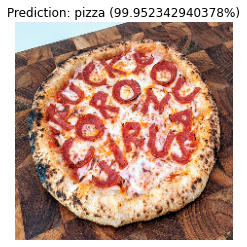

In [ ]:
pred_and_plot("/content/tfihu2k6p7o41.jpg")

## Multi-class Image Classification

In [ ]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip

--2022-06-24 11:31:21--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.253.63.128, 142.250.31.128, 142.251.111.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.253.63.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip’

10_food_classes_all 100%[===================>] 495.13M   196MB/s    in 2.5s    

2022-06-24 11:31:24 (196 MB/s) - ‘10_food_classes_all_data.zip’ saved [519183241/519183241]



In [ ]:
zip_ref = zipfile.ZipFile("/content/10_food_classes_all_data.zip", "r")
zip_ref.extractall()
zip_ref.close()

In [ ]:
for dirpath, dirnames, filenames in os.walk("10_food_classes_all_data"):
  print(f"{len(dirnames)} directories and {len(filenames)} files in '{dirpath}'")

2 directories and 0 files in '10_food_classes_all_data'
10 directories and 0 files in '10_food_classes_all_data/test'
0 directories and 250 files in '10_food_classes_all_data/test/chicken_curry'
0 directories and 250 files in '10_food_classes_all_data/test/hamburger'
0 directories and 250 files in '10_food_classes_all_data/test/fried_rice'
0 directories and 250 files in '10_food_classes_all_data/test/sushi'
0 directories and 250 files in '10_food_classes_all_data/test/ice_cream'
0 directories and 250 files in '10_food_classes_all_data/test/pizza'
0 directories and 250 files in '10_food_classes_all_data/test/ramen'
0 directories and 250 files in '10_food_classes_all_data/test/grilled_salmon'
0 directories and 250 files in '10_food_classes_all_data/test/steak'
0 directories and 250 files in '10_food_classes_all_data/test/chicken_wings'
10 directories and 0 files in '10_food_classes_all_data/train'
0 directories and 750 files in '10_food_classes_all_data/train/chicken_curry'
0 directories

In [ ]:
train_dir = "/content/10_food_classes_all_data/train"
test_dir = "/content/10_food_classes_all_data/test"

In [ ]:
import pathlib
import numpy
data_dir = pathlib.Path(train_dir)
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

['chicken_curry' 'chicken_wings' 'fried_rice' 'grilled_salmon' 'hamburger'
 'ice_cream' 'pizza' 'ramen' 'steak' 'sushi']


Image shape: (512, 512, 3)


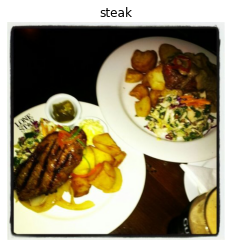

In [ ]:
import random
img = view_random_image(target_dir=train_dir+'/', target_classes=class_names)

In [ ]:
train_datagen = ImageDataGenerator(rescale=1/255.,
                                   rotation_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   width_shift_range=0.2,
                                   height_shift_range=0.3,
                                   horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1/255.)

train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224,224),
                                               batch_size=32,
                                               class_mode="categorical")
test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=(224,224),
                                             batch_size=32,
                                             class_mode="categorical")

Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


In [ ]:
model_9 = Sequential([
  Conv2D(10, 3, input_shape=(224,224,3)),
  tf.keras.layers.Activation(activation="relu"),
  Conv2D(10, 3, activation="relu"),
  MaxPool2D(),
  Conv2D(10, 3, activation="relu"),
  Conv2D(10, 3, activation="relu"),
  MaxPool2D(),
  Flatten(),
  Dense(10, activation="softmax")
])

model_9.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

history_9 = model_9.fit(train_data,
                        epochs=10,
                        validation_data=test_data,
                        steps_per_epoch=len(train_data),
                        validation_steps=len(test_data))

Epoch 1/10
235/235 [==============================] - 113s 472ms/step - loss: 2.2824 - accuracy: 0.1179 - val_loss: 2.2117 - val_accuracy: 0.1612
Epoch 2/10
235/235 [==============================] - 109s 464ms/step - loss: 2.1948 - accuracy: 0.1899 - val_loss: 2.0505 - val_accuracy: 0.2564
Epoch 3/10
235/235 [==============================] - 122s 519ms/step - loss: 2.1369 - accuracy: 0.2307 - val_loss: 1.9505 - val_accuracy: 0.3220
Epoch 4/10
235/235 [==============================] - 109s 465ms/step - loss: 2.0870 - accuracy: 0.2563 - val_loss: 1.9204 - val_accuracy: 0.3256
Epoch 5/10
235/235 [==============================] - 110s 468ms/step - loss: 2.0599 - accuracy: 0.2735 - val_loss: 1.8422 - val_accuracy: 0.3684
Epoch 6/10
235/235 [==============================] - 109s 466ms/step - loss: 1.9932 - accuracy: 0.3041 - val_loss: 1.9118 - val_accuracy: 0.3344
Epoch 7/10
235/235 [==============================] - 111s 472ms/step - loss: 1.9793 - accuracy: 0.3076 - val_loss: 1.8458 -

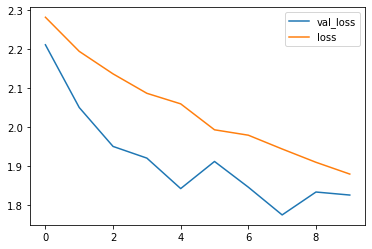

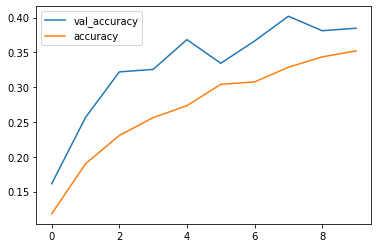

In [ ]:
pd.DataFrame(history_9.history)[["val_loss", "loss"]].plot()
pd.DataFrame(history_9.history)[["val_accuracy", "accuracy"]].plot()

In [ ]:
tf.random.set_seed(69)

model_10 = Sequential([
  Conv2D(32, 3, activation="relu", input_shape=(224,224,3)),
  Conv2D(32, 3, activation="relu"),
  MaxPool2D(3),
  Conv2D(32, 3, activation="relu"),
  Conv2D(32, 3, activation="relu"),
  MaxPool2D(3),
  Conv2D(32, 3, activation="relu"),
  Conv2D(32, 3, activation="relu"),
  MaxPool2D(3),
  Flatten(),
  Dense(10, activation="softmax")
])

model_10.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
                optimizer=Adam(),
                metrics=["accuracy"])

history_10 = model_10.fit(train_data,
                          epochs=20,
                          steps_per_epoch=len(train_data),
                          validation_data=test_data,
                          validation_steps=len(test_data))

Epoch 1/20
235/235 [==============================] - 115s 482ms/step - loss: 2.2430 - accuracy: 0.1515 - val_loss: 2.1465 - val_accuracy: 0.1980
Epoch 2/20
235/235 [==============================] - 146s 620ms/step - loss: 2.1862 - accuracy: 0.1924 - val_loss: 2.0263 - val_accuracy: 0.2600
Epoch 3/20
235/235 [==============================] - 114s 486ms/step - loss: 2.0818 - accuracy: 0.2559 - val_loss: 1.9503 - val_accuracy: 0.3124
Epoch 4/20
235/235 [==============================] - 115s 489ms/step - loss: 2.0348 - accuracy: 0.2813 - val_loss: 1.9237 - val_accuracy: 0.3384
Epoch 5/20
235/235 [==============================] - 114s 483ms/step - loss: 1.9767 - accuracy: 0.3132 - val_loss: 1.7593 - val_accuracy: 0.4004
Epoch 6/20
235/235 [==============================] - 113s 481ms/step - loss: 1.9143 - accuracy: 0.3316 - val_loss: 1.7538 - val_accuracy: 0.3988
Epoch 7/20
235/235 [==============================] - 113s 480ms/step - loss: 1.8575 - accuracy: 0.3543 - val_loss: 1.6007 -

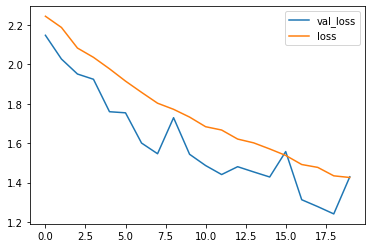

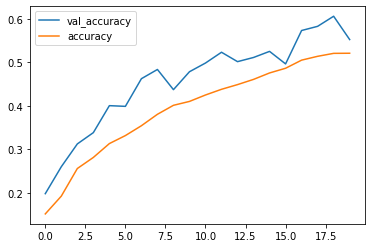

In [ ]:
pd.DataFrame(history_10.history)[["val_loss", "loss"]].plot()
pd.DataFrame(history_10.history)[["val_accuracy", "accuracy"]].plot()

In [ ]:
tf.random.set_seed(69)

model_11 = Sequential([
  Conv2D(64, 2, activation="relu", input_shape=(224,224,3)),
  Conv2D(64, 2, activation="relu"),
  MaxPool2D(2),
  Flatten(),
  Dense(100, activation="relu"),
  Dense(100, activation="relu"),
  Dense(100, activation="relu"),
  Dense(10, activation="softmax")
])

model_11.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
                optimizer=Adam(),
                metrics=["accuracy"])

history_11 = model_11.fit(train_data,
                          epochs=20,
                          steps_per_epoch=len(train_data),
                          validation_data=test_data,
                          validation_steps=len(test_data))

Epoch 1/20
235/235 [==============================] - 124s 518ms/step - loss: 2.6492 - accuracy: 0.1463 - val_loss: 2.1363 - val_accuracy: 0.2292
Epoch 2/20
235/235 [==============================] - 120s 512ms/step - loss: 2.1634 - accuracy: 0.2223 - val_loss: 2.0254 - val_accuracy: 0.2788
Epoch 3/20
235/235 [==============================] - 121s 516ms/step - loss: 2.1043 - accuracy: 0.2413 - val_loss: 2.0275 - val_accuracy: 0.2880
Epoch 4/20
235/235 [==============================] - 121s 515ms/step - loss: 2.0863 - accuracy: 0.2583 - val_loss: 1.9577 - val_accuracy: 0.3208
Epoch 5/20
235/235 [==============================] - 121s 517ms/step - loss: 2.0349 - accuracy: 0.2747 - val_loss: 1.9551 - val_accuracy: 0.3252
Epoch 6/20
235/235 [==============================] - 121s 515ms/step - loss: 2.0258 - accuracy: 0.2829 - val_loss: 1.9226 - val_accuracy: 0.3340
Epoch 7/20
235/235 [==============================] - 122s 518ms/step - loss: 1.9856 - accuracy: 0.3039 - val_loss: 1.9365 -

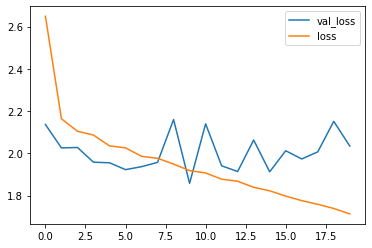

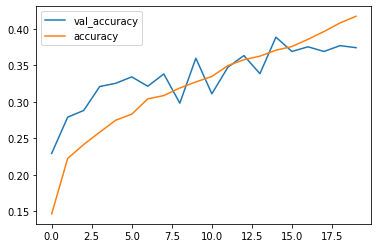

In [ ]:
pd.DataFrame(history_11.history)[["val_loss", "loss"]].plot()
pd.DataFrame(history_11.history)[["val_accuracy", "accuracy"]].plot()

In [ ]:
tf.random.set_seed(69)

model_12 = Sequential([
  Conv2D(64, 2, activation="relu", input_shape=(224,224,3)),
  Conv2D(64, 2, activation="relu"),
  MaxPool2D(2),
  Conv2D(64, 2, activation="relu"),
  Conv2D(64, 2, activation="relu"),
  MaxPool2D(2),
  Flatten(),
  Dense(100, activation="relu"),
  Dense(100, activation="relu"),
  Dense(100, activation="relu"),
  Dense(100, activation="relu"),
  Dense(100, activation="relu"),
  Dense(10, activation="softmax")
])

model_12.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
                optimizer=Adam(),
                metrics=["accuracy"])

history_12 = model_12.fit(train_data,
                          epochs=20,
                          steps_per_epoch=len(train_data),
                          validation_data=test_data,
                          validation_steps=len(test_data))

Epoch 1/20
235/235 [==============================] - 128s 540ms/step - loss: 2.2496 - accuracy: 0.1613 - val_loss: 2.2082 - val_accuracy: 0.1716
Epoch 2/20
235/235 [==============================] - 123s 524ms/step - loss: 2.1866 - accuracy: 0.1833 - val_loss: 2.0997 - val_accuracy: 0.2248
Epoch 3/20
235/235 [==============================] - 124s 528ms/step - loss: 2.1471 - accuracy: 0.2103 - val_loss: 2.0744 - val_accuracy: 0.2504
Epoch 4/20
235/235 [==============================] - 123s 525ms/step - loss: 2.0875 - accuracy: 0.2389 - val_loss: 1.9218 - val_accuracy: 0.3088
Epoch 5/20
235/235 [==============================] - 125s 530ms/step - loss: 2.0420 - accuracy: 0.2693 - val_loss: 2.0461 - val_accuracy: 0.2692
Epoch 6/20
235/235 [==============================] - 123s 525ms/step - loss: 2.0255 - accuracy: 0.2756 - val_loss: 1.8931 - val_accuracy: 0.3240
Epoch 7/20
235/235 [==============================] - 124s 528ms/step - loss: 1.9771 - accuracy: 0.2879 - val_loss: 1.8643 -

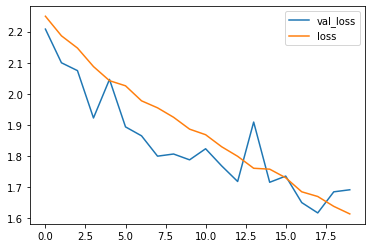

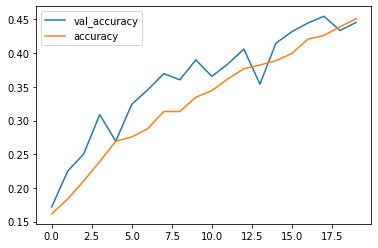

In [ ]:
pd.DataFrame(history_12.history)[["val_loss", "loss"]].plot()
pd.DataFrame(history_12.history)[["val_accuracy", "accuracy"]].plot()

In [ ]:
def pred_and_plot_multi(filename, class_names=class_names, model=model_8):
  img = load_and_prep_image(filename)
  pred = model.predict(tf.expand_dims(img, axis=0))
  pred_class = class_names[pred.argmax()]
  plt.imshow(img)
  sureness = (pred[0].max())*100
  plt.title(f"Prediction: {pred_class} ({sureness}%)")
  plt.axis(False);

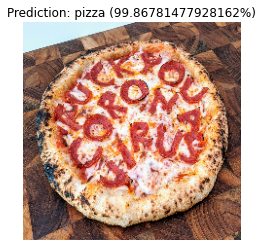

In [ ]:
pred_and_plot_multi("/content/tfihu2k6p7o41.jpg", class_names=class_names, model=model_10)

In [ ]:
img = load_and_prep_image("/content/tfihu2k6p7o41.jpg")

In [ ]:
pred = model_10.predict(tf.expand_dims(img, axis=0))

In [ ]:
pred

array([[1.7510547e-05, 1.0778807e-06, 1.8695673e-05, 7.0166003e-05,
        7.5380936e-05, 2.9400841e-05, 9.9867815e-01, 9.5311931e-04,
        1.4413215e-04, 1.2250309e-05]], dtype=float32)

In [ ]:
pred.argmax()

6